In [6]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import matplotlib.pyplot as plt
import pandas as pd
import collections
import string
%matplotlib inline

from cipher.affine import *
from cipher.keyword_cipher import *
from support.utilities import *
from support.text_prettify import *
from support.language_models import *
from support.plot_frequency_histogram import *

c2a = open('2a.ciphertext').read()
c2b = open('2b.ciphertext').read()

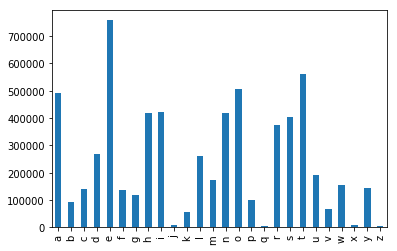

In [3]:
freqs = pd.Series(english_counts)
freqs.plot(kind='bar')

In [4]:
key_a, score = affine_break(c2a)
key_a, score

((5, 25, True), -761.8388033231918)

In [5]:
print(affine_decipher(c2a, key_a[0], key_a[1]))

DEAR MARK, 

THANKS FOR THE LATEST REPORT FROM THE ON-SITE TEAM. IT SHOWS THAT THE SHIPBOARD GPS SYSTEM WAS COMPLETELY SCRAMBLED SO WE ARE NOT GOING TO BE ABLE TO TRACE HER MOVEMENTS FROM THAT. DO WE HAVE ANY ODD TRACES FROM ONSHORE RADAR THAT GIVE A HINT OF WHERE SHE MIGHT HAVE BEEN? 

THE COMMENT IN THE LAST MESSAGE THAT THE PIRATES COMPLETED THE SURVEY EVEN THOUGH THEY HAD MOVED SOUTH TO AVOID DETECTION SHOULD HAVE TOLD ME THAT THE SURVEY WAS NOT GEOGRAPHIC. AT FIRST I THOUGHT IT MIGHT HAVE BEEN REFERRING TO A TELECOMS SURVEY SINCE YOU MENTIONED THE LONG AERIAL, BUT ACTUALLY THE ATTACHED MESSAGE IS VERY REVEALING. STILL NOT SURE WHAT THE SURVEY WAS FOR THOUGH, AND HOW THAT IS CONNECTED TO THE MISSING SUPERSTRUCTURE. CAN YOU GET ME ANY PICTURES? 

HARRY 



In [7]:
key_b, score = keyword_break_mp(c2b)
key_b, score

(('flag', <KeywordWrapAlphabet.from_largest: 3>), -367.81492429457404)

In [8]:
print(lcat(tpack(segment(sanitise(keyword_decipher(c2b, key_b[0], key_b[1]))))))

calm weather allowed us to complete the hull survey and establish its integrity no major remedial
works were required and the pumps and extra bulkheads were installed out in deep waters over the
next five days we are now testing the system for reliability and safety before moving on to phase
three of the operation operation trojan remains on target


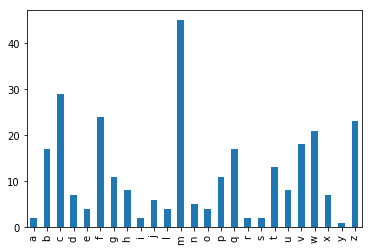

In [9]:
freqs_2b = pd.Series(collections.Counter([l.lower() for l in c2b if l in string.ascii_letters]))
freqs_2b.plot(kind='bar')